## Unsupervised Machine Learning

Up to this point, we've been working with machine learning to predict values. These values can be whether a particular student will be admitted to a scholar program, whether a patient has heart disease, etc. In these scenarios, we're working with supervised machine learning.

In supervised machine learning, the dataset contains a target variable that we're trying to predict. As the name suggests, we can supervise our model's performance since it's possible to objectively verify if its outputs are correct.



As there's no target variable, we can't supervise the algorithm by objectively telling whether or not the outputs are correct. Therefore, it's up to the data scientist to analyze the outputs and understand the pattern the algorithm found in the data.

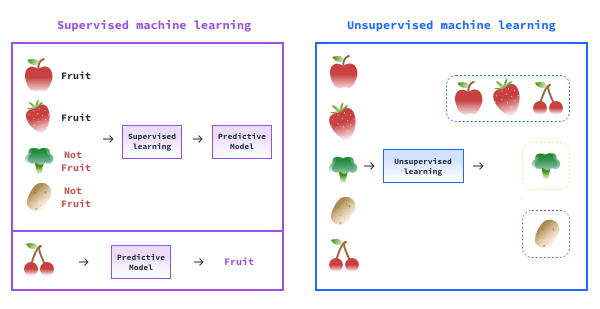

Common unsupervised machine learning types:

- `Clustering`: the process of segmenting the dataset into groups based on the patterns found in the data. Used to segment customers and products, for example.
- `Association`: the goal is to find patterns between the variables, not the entries. It's frequently used for market basket analysis, for instance.
- `Anomaly detection`: this kind of algorithm tries to identify when a particular data point is completely off the rest of the dataset pattern.

## The K-means Algorithm

In this course, we'll focus on the use of unsupervised machine learning for clustering with the K-means algorithm. The K-means algorithm is an iterative algorithm designed to find a split for a dataset given a number of clusters set by the user. In other words, the K-means algorithm helps us split our population into a given number of groups. The number of clusters is called K.

As an iterative algorithm, K-means is based on repeating the same process over and over again for a determined number of times or until it reaches a determined stopping condition. For K-means, the algorithm randomly chooses K points to be the centers of the clusters. These points are called the clusters' centroids. K is set by the user. Then, an iterative process begins where each iteration is made of the following steps:

- Calculate the euclidean distance between each data point to each centroid.
- Assign each data point as belonging to the cluster of the closest centroid.
- Calculate new centroids using the mean of the datapoints in each cluster.

The algorithm will then run until a maximum number of iterations is reached or until the centroids no longer change.

Note that, in each iteration, new centroids (the big dots) are calculated and then new clusters are reassigned.

During this course, we'll use a dataset containing information about customers of a mall. The goal is to use the data to segment the customers into groups.

The dataset contains the following columns:

- `CustomerID`: a unique identifier for each customer.
- `Gender`: the gender of the customer.
- `Age`: the customer's age in years.
- `Annual Income`: the customer's annual income in thousand of dollars.
- `Spending Score`: a score based on customer shopping patterns. Goes from 1 to 100.

## A Pictorial Approach

On this screen, we'll see the K-means algorithm working step by step.

Suppose we have a dataset with twenty rows and two variables. We're not interested in what these variables are or what they represent at this point. Let's just call them X and Y.

First, let's see a scatter plot of these two variables:

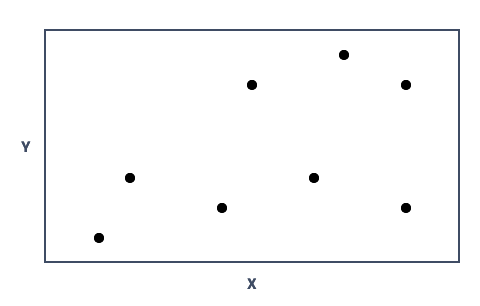

The first step of the algorithm is to initialize random centroids. In this case, three centroids. On top of the previous scatter plot, we now have three colored dots representing each of these centroids:

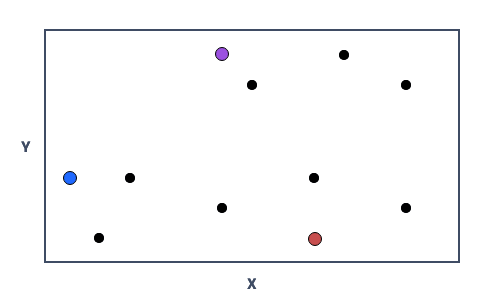

The algorithm then calculates the distance from each point to each centroid and assigns each point as belonging to the closest centroids.

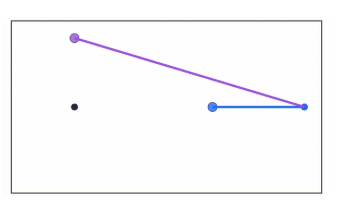

The group of data points belonging to a single centroid is what we call a cluster. In the plot below, each cluster is represented by a color. Let's name these clusters 1, 2, and 3.

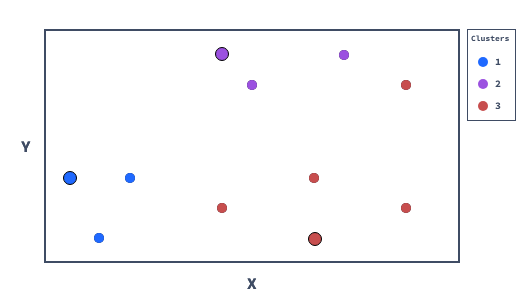

That was the first iteration: centroids were initialized and clusters assigned.

For the second iteration, we'll have new centroids. However, they won't be random anymore. The centroids coordinates will now be the mean of all x-axis coordinates and the mean y-axis coordinates of all points belonging to its cluster.

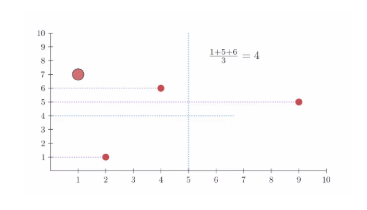

The chart below shows the new centroids, before reassigning the clusters.

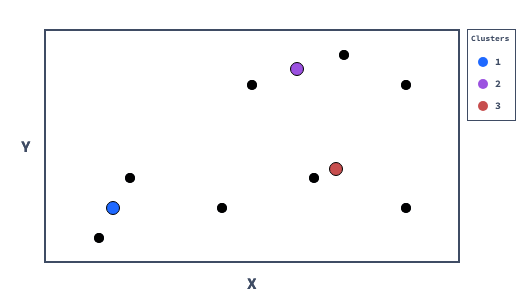

The distances are recalculated, and all the clusters are assigned again:

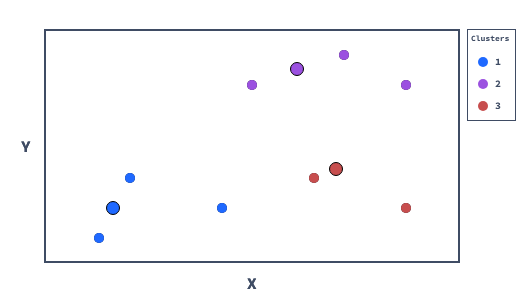

Notice that most points were kept in the same cluster. That means that after the centroids changed, the closest centroid to those points remained the same. However, some points changed colors, which means that their closest centroid did change, and, therefore, they are assigned to a new cluster.

The following two steps would look like this:

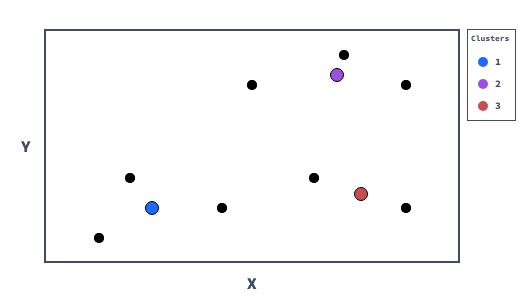

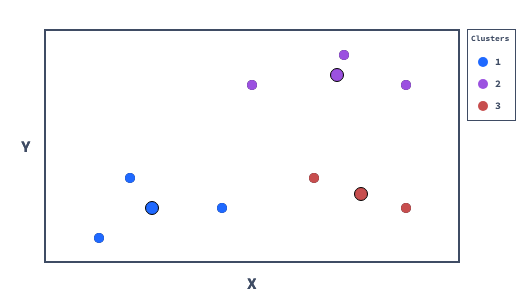

This process will proceed until the centroids are located in the mean of their cluster, which is the same as saying the iteration will continue until the coordinates of the centroids don't change anymore (or until we decide to stop the algorithm).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.shape

(200, 5)

In [4]:
customers.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [5]:
customers.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [6]:
customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##  Initialize Centroids

Now that we've become familiar with the dataset, we'll start to build our own clustering algorithm. This will be a simple version of K-means intended to help us understand the concepts and mechanics behind the actual algorithm.

We'll follow the steps listed before in order to segment the customers and also visualize the segmentation. To make the visualization easier, the clustering will be performed using only two clusters and two variables, Age and Spending Score, which makes it possible to plot in the two-dimensional chart.

The first step is to randomly initialize the centroids. Then we'll need to save the coordinates of each centroid in order to later compare to each data point.

Let's do this!

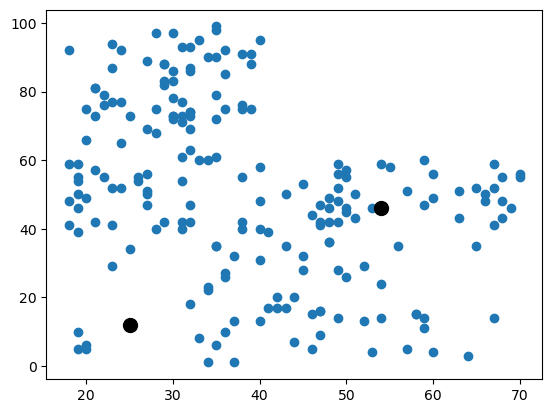

In [7]:
cols_to_keep = ['Age', 'Spending Score']

customers = customers[cols_to_keep].copy()

centroids = customers.sample(2)

def fetch_coordinates(df):
    age_centroid_1 = df.iloc[0, 0]
    score_centroid_1 = df.iloc[0, 1]
    age_centroid_2 = df.iloc[1, 0]
    score_centroid_2 = df.iloc[1, 1]
    return age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2
  
age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)

plt.scatter(customers['Age'], customers['Spending Score'])
plt.scatter(centroids['Age'], centroids['Spending Score'], color='black', s=100)
plt.show()

## Distances Between the Points

Now that we've initialized the first couple of centroids, we need to calculate the (Euclidean) distance between each customer to each of the centroids.

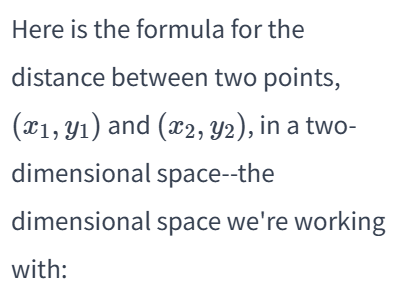

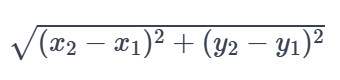

The formula calculates the squared distance between the corresponding coordinates of each point, adds them together, and takes the square root.

Pictorially, the result is the length of the line that connects the two points.

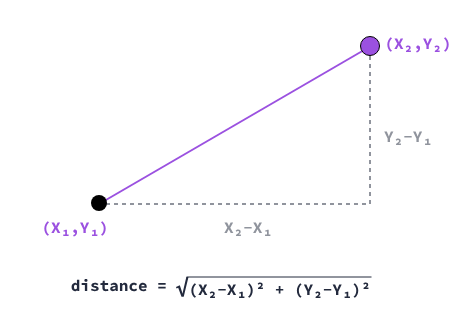

This formula can be easily translated into Python. For instance, to calculate the distance between the two centroids in new columns of the centroids DataFrame, all we need to do is this:

In [8]:
# centroids['dist_centroid_1'] = np.sqrt((centroids['Age'] - age_centroid_1)**2 + (centroids['Spending Score'] - score_centroid_1)**2)
# centroids['dist_centroid_2'] = np.sqrt((centroids['Age'] - age_centroid_2)**2 + (centroids['Spending Score'] - score_centroid_2)**2)

Note that the distance between each centroid to itself is zero.

This formula will be used to calculate the distance from every blue dot to both of the black dots in the scatter plot below:

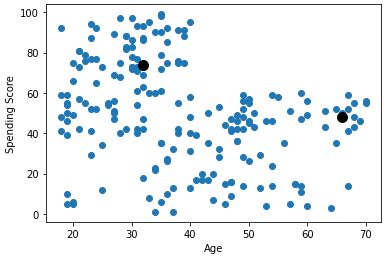

In [9]:
def calculate_distance(row, age_centroid, score_centroid):
    distance = np.sqrt((row['Age'] - age_centroid) ** 2 + (row['Spending Score'] - score_centroid) ** 2)
    return distance

In [10]:
customers['dist_centroid_1'] = customers.apply(lambda x: calculate_distance(x, age_centroid_1, score_centroid_1), axis=1)

In [11]:
customers['dist_centroid_2'] = customers.apply(lambda x: calculate_distance(x, age_centroid_2, score_centroid_2), axis=1)

In [12]:
customers

,Age,Spending Score,dist_centroid_1,dist_centroid_2
0,19,39,35.693137,27.658633
1,21,81,48.104054,69.115845
2,20,6,52.497619,7.810250
3,23,77,43.840620,65.030762
4,31,40,23.769729,28.635642
...,...,...,...,...
195,35,79,38.078866,67.742158
196,45,28,20.124612,25.612497
197,32,74,35.608988,62.393910
198,32,18,35.608988,9.219544


## Assigning Clusters

At this point, we have the distance from each customer to both of the clusters' centroids. Therefore, all we need to do is to assign each customer to the cluster with the closer centroid.

Once we have that, we can visualize how the first split went by creating a scatter plot. However, in this plot, we want to use different colors for different clusters so we can actually see the difference.

A couple of screens ago, we used the `plt.scatter()` function to plotting. Although `matplotlib` is great, some particular tricks can be a bit hard to implement. Creating a scatter plot with different colors is one of them.

The seaborn library is another great visualization tool and it provides an easier to way implement what we need. The [seaborn.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function is very similar to the plt.scatter(), with the following differences:

- `x` and `y` parameters don't receive the columns, just their name, which means that instead of `df['columns_name']`, it receives `'column_name'`.
- There's a `data` parameter that receives the DataFrame in which the columns are contained.
- There's the optional hue parameter. This parameter represents the column by which we divide the scatter plot in different colors.

This function will be very useful for visualizing the clusters we created.

In [13]:
def calculate_distance_assign_clusters(customers, centroids):
    age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)
    customers['dist_centroid_1'] = customers.apply(lambda x: calculate_distance(x, age_centroid_1, score_centroid_1), axis=1)
    customers['dist_centroid_2'] = customers.apply(lambda x: calculate_distance(x, age_centroid_2, score_centroid_2), axis=1)
    customers['cluster'] = np.where(customers['dist_centroid_1'] < customers['dist_centroid_2'], 1, 2)
    return customers
    

In [14]:
customers = calculate_distance_assign_clusters(customers, centroids)

In [15]:
customers

,Age,Spending Score,dist_centroid_1,dist_centroid_2,cluster
0,19,39,35.693137,27.658633,2
1,21,81,48.104054,69.115845,1
2,20,6,52.497619,7.810250,2
3,23,77,43.840620,65.030762,1
4,31,40,23.769729,28.635642,1
...,...,...,...,...,...
195,35,79,38.078866,67.742158,1
196,45,28,20.124612,25.612497,1
197,32,74,35.608988,62.393910,1
198,32,18,35.608988,9.219544,2


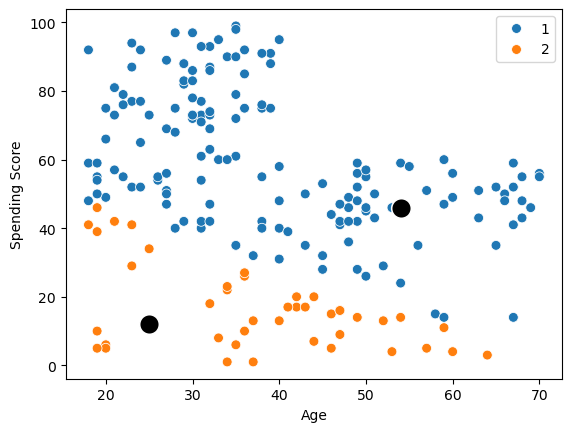

In [16]:
sns.scatterplot(customers, x='Age', y='Spending Score', hue='cluster',palette='tab10', s=50)
sns.scatterplot(centroids, x='Age', y='Spending Score', color='black', s=200)
plt.show()

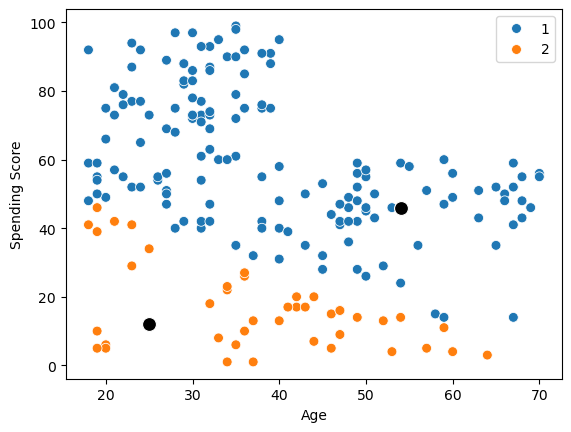

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_distance_assign_clusters(customers, centroids):
    age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)
    customers['dist_centroid_1'] = customers.apply(calculate_distance, args=(age_centroid_1, score_centroid_1), axis=1)
    customers['dist_centroid_2'] = customers.apply(calculate_distance, args=(age_centroid_2, score_centroid_2), axis=1)
    customers['cluster'] = np.where(
        customers['dist_centroid_1'] < customers['dist_centroid_2'], 1, 2
    )
    return customers
customers = calculate_distance_assign_clusters(customers, centroids)
  
sns.scatterplot(x='Age', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot(x='Age', y='Spending Score', color='black', data=centroids, s=100)
plt.show()

##  Creating New Clusters

We have our first cluster split. However, the K-means algorithm consists of multiple iterations until the centroids converge to the mean of their clusters.

We'll perform the next step in this iteration by creating new centroids and assigning clusters for a second time.

As the name of the algorithm suggests, the new centroids are calculated by the mean of each of the K clusters, in our case, the mean of the two clusters.

Once we have the Age and Spending Score coordinates from the new centroids, the process will repeat:

1. Calculate the distance of each customer to the new centroids.
2. Assign new clusters to the customer based on the new distances.
3. Visualize the new clusters.

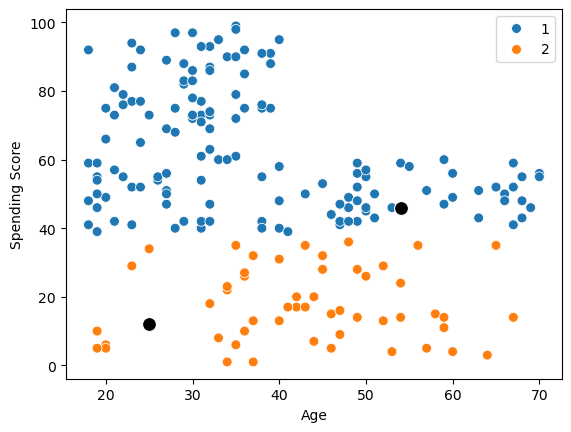

In [18]:
new_centroids = customers.groupby('cluster')[['Age', 'Spending Score']].mean().reset_index()
new_centroids.drop('cluster', axis=1, inplace=True)
customers = calculate_distance_assign_clusters(customers, new_centroids)
sns.scatterplot(x='Age', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot(x='Age', y='Spending Score', color='black', data=centroids, s=100)
plt.show()

## Wrapping in a Function

We have so far built an algorithm that performs two iterations and splits the dataset into two clusters.

Before we move on, let's first wrap everything we've done so far inside a single, consolidated function. Then we'll be able to build from this and develop a more complex algorithm.

This function should receive the `customers` DataFrame as an argument, then do the entire process we have developed in this lesson.



In [19]:
cols_to_keep = ['Age', 'Spending Score']

customers = customers[cols_to_keep].copy()


def create_clusters(df):
    centroids = df.sample(2)
    df = calculate_distance_assign_clusters(df, centroids)
    new_centroids = df.groupby('cluster')[['Age', 'Spending Score']].mean().reset_index()
    new_centroids.drop('cluster', axis=1, inplace=True)
    customers = calculate_distance_assign_clusters(df, new_centroids)
    return df['cluster']


clusters = create_clusters(customers)
print(clusters)

0      2
1      1
2      2
3      1
4      2
      ..
195    1
196    2
197    1
198    2
199    1
Name: cluster, Length: 200, dtype: int32


## Iterative K-means algorithm

### Initialize K Centroids

In the previous lesson, we built our first version of a K-means-based algorithm. This initial version was capable of splitting the dataset twice, and we were able to notice some differences and improvements from the first to second split.

We'll now build from what we've done in order to develop a more robust, complete version of K-means. In this version, the code will cluster the data not twice, but as many times as necessary for the centroids to converge towards the mean of their clusters — or until it reaches a maximum number of iterations (N) that we'll set.

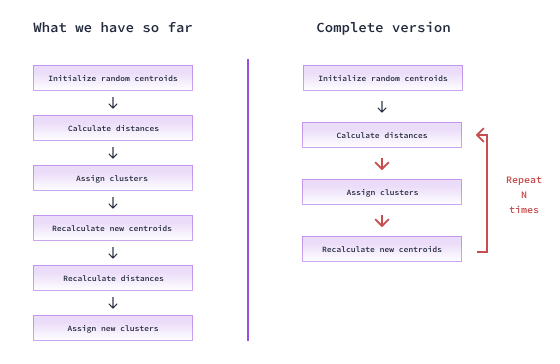

Another important improvement from the first version is that we'll be able to use a different number of clusters (K) through the same code without being limited to splitting the dataset between only two clusters, as in lesson one.

Finally, in the new implementation, we'll still only work with two variables; however, we'll write more flexible code that does not rely on the variables' names, allowing the users to use any combinations of features they want to.

To achieve all this, we'll first need to initialize as many centroids as we want. Remember that in the previous lesson, our `fetch_coordinates` function was only capable of dealing with two centroids.

We'll use the `Annual Income` instead of the `Age` column, alongside `Spending Score`.

In [20]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep]

def get_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    return centroids, centroids.values.tolist()

def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i + 1}'
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2)
        names.append(name)
    
    return df, names

centroids, coords = get_centroids(customers, 3)
customers, dist_names = calculate_distance(customers, coords)

print(customers)
print(dist_names)

     Annual Income  Spending Score  dist_centroid_1  dist_centroid_2  \
0               15              39        29.681644        31.016125   
1               15              81        36.069378        42.449971   
2               16               6        54.561891        52.153619   
3               16              77        32.557641        38.897301   
4               17              40        27.459060        28.792360   
..             ...             ...              ...              ...   
195            120              79        83.522452        81.344945   
196            126              28        90.138782        84.899941   
197            126              74        88.073833        85.440037   
198            137              18       103.817147        98.351411   
199            137              83       100.960388        98.681305   

     dist_centroid_3  
0          37.576588  
1          42.801869  
2          59.076222  
3          39.661064  
4          35.341194

In [21]:
coords

[[40, 55], [44, 50], [49, 55]]

## Calculating Distances

You may remember how we calculated the distances between the centroids and the data points in the previous lesson. We used the Euclidean distance formula to create new columns in the `customers` DataFrame for each centroid. This means that we ended up with two columns: `dist_centroid_1` and `dist_centroid_2`.
As we now need to calculate the distance for any number of centroids we want to, that approach won't work anymore. We need to write code that will create k new columns from the dist_centroid_1 to dist_centroid_k.la

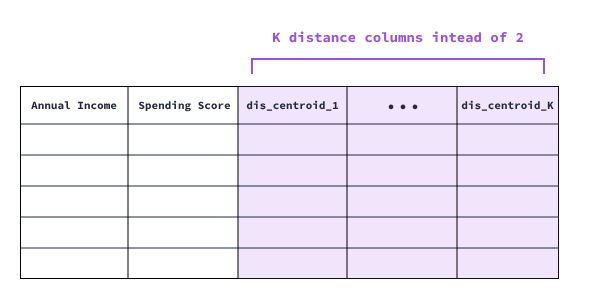

In the code displayed on below, we started creating a function called `calculate_distance` that takes a two-column DataFrame and the list of lists with the centroids' coordinates as inputs. Inside the function, we'll initialize an empty list called `names`. The function then loops through the centroids' coordinates list using `enumerate`, so we can have access to the value and the index of each inner list.

## Assigning Clusters

We're now able to initialize as many centroids as we want and also calculate the distance from each point to as many centroids, too. The next step is to assign clusters.

When we limit the algorithm to only two clusters, it's much easier to determine the cluster for a point. It's only a matter of comparing two distances. We now need to be able to compare as many distances as we want, which demands a different approach.

That's the reason the `calculate_distance` function from the last screen returns not only the DataFrame with the distance columns, but also the names of such columns.

This list with names will be used to select only the columns containing the distances so we can select the one closer to the data point.

The `DataFrame.idxmin()` method returns the index of the minimum value in columns. However, if we set `axis=1`, it returns the columns with the minimum value in a row. We can then create the `cluster` column to select the column with the minimum distance:

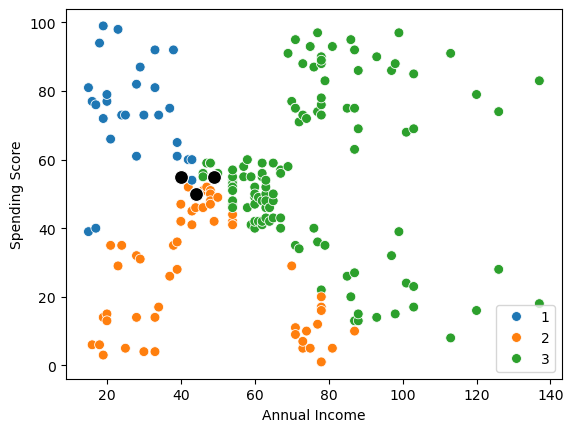

In [22]:
customers['cluster'] = customers[dist_names].idxmin(axis=1).str[-1].astype(int)
sns.scatterplot(customers, x='Annual Income', y='Spending Score', hue='cluster', palette='tab10', s=50)
sns.scatterplot(centroids, x='Annual Income', y='Spending Score', color='black', s=100)
plt.show()

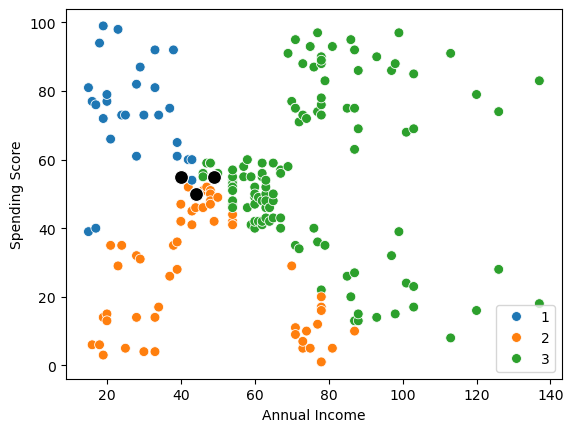

In [27]:
customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]
# print(customers)
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot(x='Annual Income', y='Spending Score', color='black', data=centroids, s=100)

plt.show()

## Recalculating Centroids

It's now time to recalculate the centroids again, just like in this image from the previous lesson:

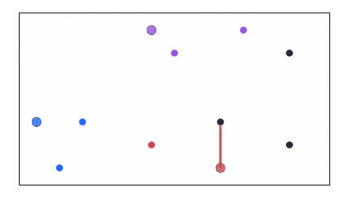

As we've seen before, the centroids are only randomly initialized once, and, from the second time on, they are the mean of all points in their cluster. This means that we do not need to use the get_centroids function again.

The process of recalculating centroids is similar to what we've done in the last lesson, but now we'll also extract the coordinates of the centroids.

In [34]:
variables = customers.columns[:2]

new_centroids = customers.groupby('cluster')[variables].mean()
new_centroids.reset_index().drop('cluster', axis=1, inplace=True)
new_coords = new_centroids.map(lambda x: round(x, 4)).values.tolist()
new_coords

[[27.7586, 72.931], [47.1964, 26.5714], [75.3391, 55.9739]]

In [35]:
variables = customers.columns[:2]


new_centroids = round(customers.groupby('cluster')[variables].mean(), 4)
new_coords = new_centroids.values.tolist()

print(new_centroids)
print(new_coords)

         Annual Income  Spending Score
cluster                               
1              27.7586         72.9310
2              47.1964         26.5714
3              75.3391         55.9739
[[27.7586, 72.931], [47.1964, 26.5714], [75.3391, 55.9739]]
